In [1]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("data/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
df.tail()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6986,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.01570,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.00017,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,CANDIDATE,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.00769,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,FALSE POSITIVE,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.00285,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
6990,FALSE POSITIVE,0,0,1,1,4.856035,6.360000e-05,-6.360000e-05,135.993300,0.01080,...,-225,4.385,0.054,-0.216,1.193,0.410,-0.137,297.00977,47.121021,14.826


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6991 entries, 0 to 6990
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    6991 non-null   object 
 1   koi_fpflag_nt      6991 non-null   int64  
 2   koi_fpflag_ss      6991 non-null   int64  
 3   koi_fpflag_co      6991 non-null   int64  
 4   koi_fpflag_ec      6991 non-null   int64  
 5   koi_period         6991 non-null   float64
 6   koi_period_err1    6991 non-null   float64
 7   koi_period_err2    6991 non-null   float64
 8   koi_time0bk        6991 non-null   float64
 9   koi_time0bk_err1   6991 non-null   float64
 10  koi_time0bk_err2   6991 non-null   float64
 11  koi_impact         6991 non-null   float64
 12  koi_impact_err1    6991 non-null   float64
 13  koi_impact_err2    6991 non-null   float64
 14  koi_duration       6991 non-null   float64
 15  koi_duration_err1  6991 non-null   float64
 16  koi_duration_err2  6991 

# Select your features (columns)

In [5]:
# Set features. This will also be used as x values.
target = df["koi_disposition"]
target_names = ['CANDIDATE','CONFIRMED','FALSE POSITIVE']
features = df.drop("koi_disposition", axis=1)
feature_names=features.columns

# Create a Train Test Split

Use `koi_disposition` for the y values

In [6]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(target)
encoded_y = label_encoder.transform(target)
encoded_y

array([1, 2, 2, ..., 0, 2, 2])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, encoded_y, random_state=42)
X_train.shape, y_train.shape

((5243, 40), (5243,))

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [8]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
from sklearn.ensemble import RandomForestClassifier
 # Create a random forest classifier
rf = RandomForestClassifier(n_estimators=500)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_train_scaled, y_train)

1.0

In [10]:
importances = rf.feature_importances_
rf_feature_importance=sorted(zip(importances, feature_names), reverse=True)
rf_feature_importance

[(0.10731046299013172, 'koi_fpflag_co'),
 (0.09992624814885036, 'koi_fpflag_nt'),
 (0.06699926283936235, 'koi_fpflag_ss'),
 (0.05357394024247891, 'koi_model_snr'),
 (0.04597569900229556, 'koi_prad'),
 (0.03649961986125542, 'koi_fpflag_ec'),
 (0.03465514848125486, 'koi_duration_err2'),
 (0.033652894804261466, 'koi_prad_err2'),
 (0.031676919274292135, 'koi_duration_err1'),
 (0.03135132505248176, 'koi_prad_err1'),
 (0.02972525884215988, 'koi_steff_err1'),
 (0.027915888941553706, 'koi_steff_err2'),
 (0.026466480152915157, 'koi_time0bk_err1'),
 (0.023994372488008394, 'koi_period'),
 (0.02307291263854396, 'koi_depth'),
 (0.022469544271543112, 'koi_time0bk_err2'),
 (0.02212304755964436, 'koi_duration'),
 (0.01966197246312017, 'koi_impact'),
 (0.018442826373969958, 'koi_period_err2'),
 (0.01816312176401749, 'koi_period_err1'),
 (0.017577610094114533, 'koi_insol_err1'),
 (0.015960681408446906, 'koi_teq'),
 (0.014298587448324001, 'koi_insol'),
 (0.013904650633407912, 'koi_time0bk'),
 (0.01381879

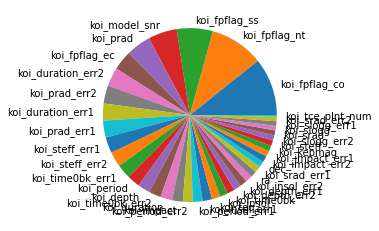

In [11]:
import matplotlib.pyplot as plt
plt.pie([a[0] for a in rf_feature_importance],labels=[a[1] for a in rf_feature_importance])
plt.show()

In [12]:
print(f"Testing Data Score: {rf.score(X_test_scaled, y_test):.5f}")

Testing Data Score: 0.89874


In [13]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)
clf.score(X_train_scaled, y_train)

1.0

In [14]:
importances = clf.feature_importances_
clf_feature_importance=sorted(zip(importances, feature_names), reverse=True)
clf_feature_importance

[(0.19498480426684975, 'koi_fpflag_nt'),
 (0.1832237219933048, 'koi_fpflag_co'),
 (0.17331823962024664, 'koi_fpflag_ss'),
 (0.13649046308685256, 'koi_model_snr'),
 (0.02983543937903136, 'koi_fpflag_ec'),
 (0.02473095099292279, 'koi_impact'),
 (0.01676721647387062, 'koi_prad'),
 (0.016688547729342522, 'dec'),
 (0.01407787385958377, 'koi_depth_err2'),
 (0.012341592512401984, 'koi_srad_err1'),
 (0.012014353843098681, 'koi_time0bk'),
 (0.011272697773886526, 'koi_steff_err1'),
 (0.010321498500378657, 'koi_steff_err2'),
 (0.010224204160856162, 'ra'),
 (0.010165653349915208, 'koi_time0bk_err2'),
 (0.010060049369330989, 'koi_duration'),
 (0.00960377156288008, 'koi_period'),
 (0.009235875904772792, 'koi_slogg_err2'),
 (0.008727629662765685, 'koi_kepmag'),
 (0.008581187383609879, 'koi_duration_err1'),
 (0.008436611842695904, 'koi_insol_err1'),
 (0.008086052931598912, 'koi_time0bk_err1'),
 (0.008044777881480359, 'koi_steff'),
 (0.0075737491194964555, 'koi_impact_err1'),
 (0.007027965463217951, 'k

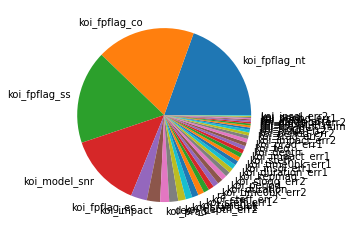

In [15]:
import matplotlib.pyplot as plt
plt.pie([a[0] for a in clf_feature_importance],labels=[a[1] for a in clf_feature_importance])
plt.show()